In [2]:
import requests
from bs4 import BeautifulSoup #we use beatuiful soup to extract data
import pandas as pd
import urllib.request
from pprint import pprint
import numpy as np

In [55]:
url1 = ['https://www.imdb.com/search/title/?title_type=feature&release_date=2010-01-01,2010-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2011-01-01,2011-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2012-01-01,2012-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2013-01-01,2013-12-31',
        'https://www.imdb.com/search/title/?title_type=feature&release_date=2014-01-01,2014-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2015-01-01,2015-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2016-01-01,2016-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2017-01-01,2017-12-31'
       ,'https://www.imdb.com/search/title/?title_type=feature&release_date=2018-01-01,2018-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2019-01-01,2019-12-31'
       ,'https://www.imdb.com/search/title/?title_type=feature&release_date=2020-01-01,2020-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2021-01-01,2021-12-31'
       ,'https://www.imdb.com/search/title/?title_type=feature&release_date=2022-01-01,2022-12-31','https://www.imdb.com/search/title/?title_type=feature&release_date=2023-01-01,2023-12-31']

In [56]:
headers = {
    'User-Agent':
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}


In [57]:
movies_data = []
for page_url in url1:
    response = requests.get(page_url,headers=headers)
    soup = BeautifulSoup(response.text,'lxml')
    for li in soup.find_all('li'):
        for h3 in li.find_all('h3'):
            title = h3.text[3:]  # extracted movie title, with H3 is part of Title text, we use that was our tether
            # we are trying to extract IMDb rating
            imdb_rating_span = li.find('span', class_='ipc-rating-star--base')
            if imdb_rating_span:
                imdb_rating = imdb_rating_span.text.strip().replace('\xa0', ' Votes: ')
            else:
                imdb_rating = 'N/A'

            # we extract Metascore rating, its present in span
            metascore_span = li.find('span', class_='sc-b0901df4-0 bcQdDJ metacritic-score-box')
            if metascore_span:
                metascore_rating = metascore_span.text.strip()
            else:
                metascore_rating = 'N/A'

            # Append data to the list
            movies_data.append([title, imdb_rating, metascore_rating])

In [57]:
# Convert the list to a pandas DataFrame
movies_df = pd.DataFrame(movies_data, columns=['Title', 'IMDb Rating', 'Metascore Rating'])

# Transfer to CSV file
movies_df.to_csv('C:/Users/vrgld/Downloads/20232024 Winter Semester COMP-603-001 Programming for Data Science - 182024 - 1250 PM/movie_scrap.csv',index = False)

In [58]:
movies_df

,Title,IMDb Rating,Metascore Rating
0,Inception,8.8 Votes: (2.5M),74
1,Kick-Ass,7.6 Votes: (592K),66
2,Unthinkable,7.0 Votes: (93K),N/A
3,The Last Airbender,4.0 Votes: (174K),20
4,Incendies,8.3 Votes: (199K),80
...,...,...,...
695,You'll Never Find Me,5.9 Votes: (2.1K),82
696,Boy Kills World,6.4 Votes: (416),69
697,May December,6.9 Votes: (50K),86
698,Taylor Swift: The Eras Tour,8.1 Votes: (20K),83


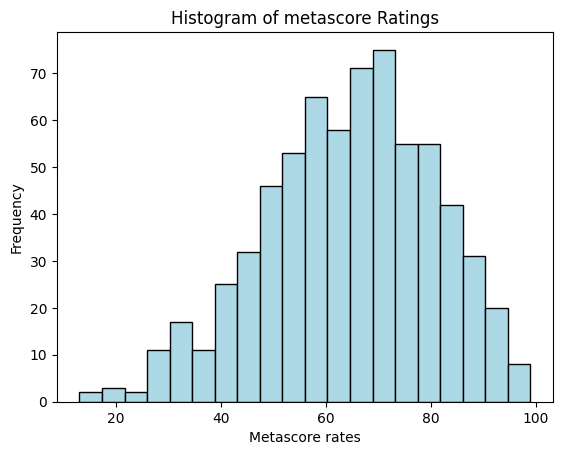

In [61]:
import matplotlib.pyplot as plt
#Elimiate the N/A so as to not skew the histograms
metascore=movies_df["Metascore Rating"].replace("N/A",np.nan).dropna().astype(float) 
plt.hist(metascore,bins=20,color='lightblue',edgecolor='black')
plt.title("Histogram of metascore Ratings")
plt.xlabel("Metascore rates")
plt.ylabel("Frequency")
plt.show()

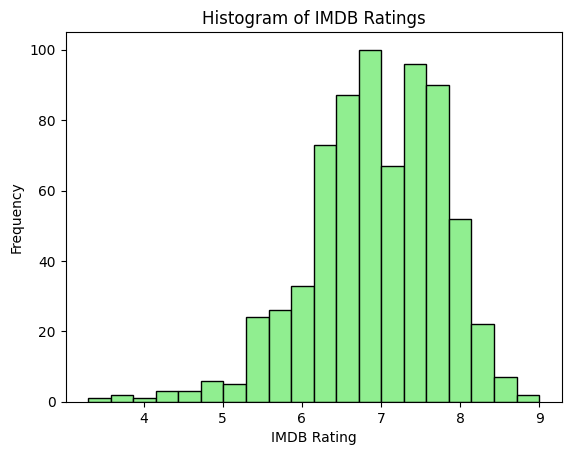

In [62]:
#Elimiate the N/A so as to not skew the histograms
imdb_score=movies_df["IMDb Rating"].str.slice(stop=3).replace("N/A",np.nan).dropna().astype(float)
plt.hist(imdb_score,bins=20,color='lightgreen',edgecolor='black')
plt.title("Histogram of IMDB Ratings")
plt.xlabel("IMDB Rating")
plt.ylabel("Frequency")
plt.show()